In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('KNN_Project_Data')

In [4]:
dataset.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [12]:
X = dataset.drop('TARGET CLASS',axis=1)

In [13]:
y = dataset.iloc[:,-1]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
stander_scale = scaler.transform(X)

In [21]:
X = pd.DataFrame(stander_scale,columns=X.columns)

In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=1)
Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
y_pred = Knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print classification_report(y_test,y_pred)
print '\n'
print confusion_matrix(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.75      0.71      0.73       124
          1       0.73      0.77      0.75       126

avg / total       0.74      0.74      0.74       250



[[88 36]
 [29 97]]


In [33]:
error_rate = []

for i in range(1,40):
    Knn = KNeighborsClassifier(n_neighbors = i)
    Knn.fit(X_train,y_train)
    pred_i = Knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

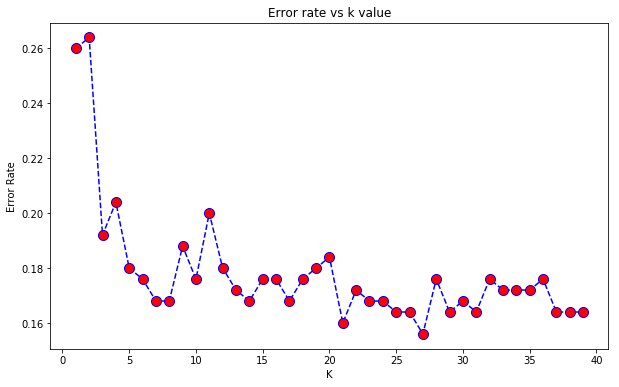

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs k value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=21)
Knn.fit(X_train,y_train)
